<center><h1>Project XI</h1><h2>Supervised machine learning Beta Bank</h2></center>

<b><u>Description:</u></b>

We work at 'Beta Bank', And we notices that slowly one month after another, customers close their accounts and leave in favor of other banks. Therefore, the management decided to try to preserve the existing one and prevent the movement out, before turning to a new customer base that will increase the number of customers and the bank's profits again.

<b><u>Our plan:</u></b>

- Dev' a model that will predict whether a customer going to leave or not


- Ml model with at least 0.59 maximum possible F1 score 


- Measure the AUC-ROC metric and compare it to the F1 score

<hr><b><u>Index Menu:</u></b>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b style="font-size: 17px;" id="index">index:</b> 
<br><br>  
<a href="#Step I">Step I - Open the data file and read the general information</a>
<br><br>     
<a href="#Step II">Step II - Prepare the data</a>
<br> <br>    
<a href="#Step III">Step III - Eploratory data analysis</a>
<br><br> 
<a href="#Step IV">Step IV - Split our source data</a>
<br><br> 
<a href="#Step V">Step V - Class imbalance correction and hyper parameter tuning</a>
<br><br> 
<a href="#general_conclusion">General conclusion</a>   
</div>

<hr><div id="Step I"><h2>Step I - Open data and general info</h2><br><i>Loading all the libraries: pandas,numpy,matplotlib,etc</i></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

# seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

# matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn modules
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# import warnings and display html
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html
from itertools import chain,cycle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_rows', None)

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


<hr><i>Loading Dataset</i>

In [2]:
# read the data
try:
    churn = pd.read_csv('/datasets/Churn.csv')
except:
    churn = pd.read_csv('Churn.csv')
    
print('Data has been read correctly!')

Data has been read correctly!


<hr><i>Data Describe:<i>

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [4]:
#print our info data
print('information about Our "churn" dataset:')
general_info(churn)

information about Our "churn" dataset:



,type,count,na,na%
RowNumber,int64,10000,0,0.0000
CustomerId,int64,10000,0,0.0000
Surname,object,10000,0,0.0000
CreditScore,int64,10000,0,0.0000
Geography,object,10000,0,0.0000
Gender,object,10000,0,0.0000
Age,int64,10000,0,0.0000
Tenure,float64,9091,909,0.0909
Balance,float64,10000,0,0.0000
NumOfProducts,int64,10000,0,0.0000



Head:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Tail:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None


Describe:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Describe include: all :



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000



nulls in the columns:

Tenure has 909 nulls, which is 9.0900% percent of Nulls
There are 1 columns with NA.


None


Zeros in the columns:

RowNumber 0
CustomerId 0
Surname 0
CreditScore 0
Geography 0
Gender 0
Age 0
Tenure 382
Balance 3617
NumOfProducts 0
HasCrCard 2945
IsActiveMember 4849
EstimatedSalary 0
Exited 7963


None


Shape: (10000, 14)


Duplicated: We have 0 duplicated rows


Dtypes:


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<hr><b style="font-size: 17px;">The `churn` dataset:</b>

<b style="font-size: 14px;">`rows`: 10000</b>

**Features**

 - `RowNumber` - data string index
 
 
 - `CustomerId` - unique customer identifier
 
 
 - `Surname` - surname
 
 
 - `CreditScore` - credit score
 
 
 - `Geography` - country of residence
 
 
 - `Gender` - gender
 
 
 - `Age` - age
 
 
 - `Tenure` - period of maturation for a customers fixed deposit (years)
 
 
 - `Balance` - account balance
 
 
 - `NumOfProducts` - number of banking products used by the customer
 
 
 - `HasCrCard` - customer has a credit card
 
 
 - `IsActiveMember` - customers activeness
 
 
 
 - `EstimatedSalary` - estimated salary
 

**Target**

 - `Exited` - customer has left

<hr><b style="font-size: 14px;">Missing values:</b>

`Tenure` - only 9091 of 10000 (909 missing)

<hr><b style="font-size: 14px;">Dtypes issues:</b>

`Tenure` - float should be integer

<hr><h2>Conclusion</h2>
    
What we found:
    
- we have total of 14 columns 

- 10k rows in each one except one that missing 909 values Tenure
    
- we going to change the 'Tenure' column from float to integer

- NumOfProducts is between 1 to 4

- HasCrCard and IsActiveMember is boolean of 0 and 1 (no and yes)
    
so let's start to prepare the data our data 

<hr><div id="Step II"><h2>Step II - Prepare the data</h2></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<b style="font-size: 17px;">Lower Case and short name few of the columns:</b><br>

In [5]:
# lower case Column names and remove white spaces if exist
columns = []
for name in churn.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

In [6]:
churn.columns = columns

In [7]:
churn.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<h3>Missing values:</h3>

In [8]:
# function to calculate the percentage of missing values
def missing_values(df):
    
    """This function calculates the % of missing values in the dataset """
    
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# check missing data
missing_values(churn)

,Missing Values,% of Total Values
tenure,909,9.1


We can see that the only column with missing value is 'Tenure' from total of 10k in each one this only have 9091 so 909 as we can see is missing so we need to fix it , but before we do it let's see how this column info look like...

<hr><h3>Preprocessing 'Tenure' Column:</h3>

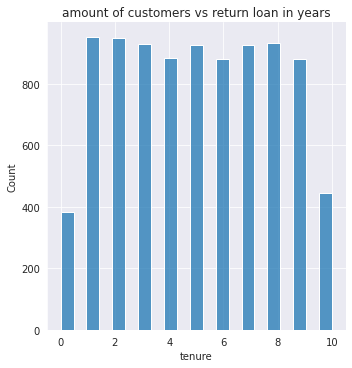

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [9]:
sns.displot(data=churn, x="tenure")
plt.title('amount of customers vs return loan in years')
plt.show();

churn['tenure'].value_counts()

In [10]:
#fill the missing values 
churn['tenure'].fillna(churn['tenure'].mode()[0], inplace=True)

In [11]:
missing_values(churn)

,Missing Values,% of Total Values


We choice to fill our missing values using the lambda function with fillna of median

<h4>Data types:</h4>

In [12]:
churn['tenure'] = churn['tenure'].astype(int)
churn.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

We choice to change the dtype of the 'tenure' column from float to intger

<h3>Columns we don't need:</h3>

Since it's looks like our data import from another database we can remove the 'RowNumber' and since it's quite personal and don't bring us any info that can help with our task we going to remove also the columns: 'customer_id' and 'surname'

In [13]:
churn = churn.drop(['customer_id','row_number', 'surname'], axis=1)

<h3>Categorical features encoding:</h3>

In [14]:
churn['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

`geography` has only three category, so it will be easy to encode it using OHE

In [15]:
churn['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

`gender` is a binary var, both values are equally represented in the dataset, So we also use the OHE here. Drop the first column for each encoded feature to avoid the dummy trap

In [16]:
churn_ohe = pd.get_dummies(churn, drop_first=True)
churn_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<hr><h2>Conclusion</h2>

What we did so far:

- lower case the columns name and put underline in multiple words column names

- fix our missing values in 'tenure' using lambda and fillna median using the groupby column num_of_products

- drop the columns 'customer_id','row_number', 'surname' 

- remove the first rows of our dataset using the ohe to avoid the dummy trap

- change the dtype of 'tenure' from float to integer 

<hr><div id="Step III"><h2>III - Eploratory data analysis to our target column 'exited':</h2></div>

<h3>'geography' Column</h3>

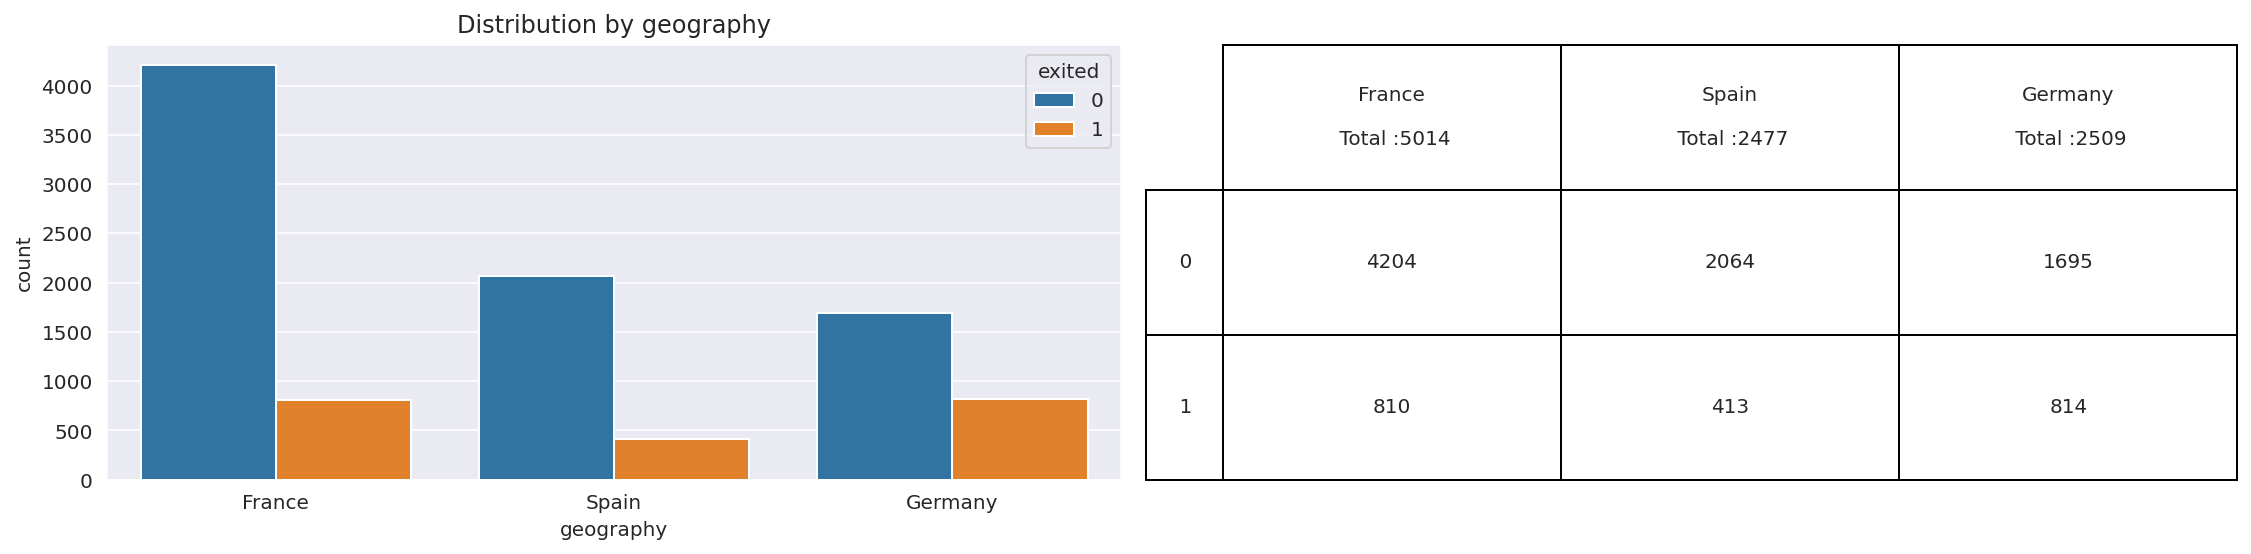

In [17]:
#plot of geography ('geo' column) by total exited column
fig = plt.figure(figsize=(20,4), dpi=144)
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(data=churn, x="geography", hue="exited")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Distribution by geography')

columns = ('France\n\n Total :5014','Spain\n\n Total :2477','Germany\n\n Total :2509')

cell_text = [4204,2064,1695],[810,413,814],
ax.table(cellText=cell_text,
         rowLabels=['    0    ','    1    '],
         colLabels=columns,
         loc='right',
         cellLoc='center',
         bbox=(1.1,0.0,1.0,1.0))
plt.show();

We can see the most loyal customers in our bank is from france when germany is the country most customers leave compere to the one how stay in our system

<h3>'gender' Column</h3>

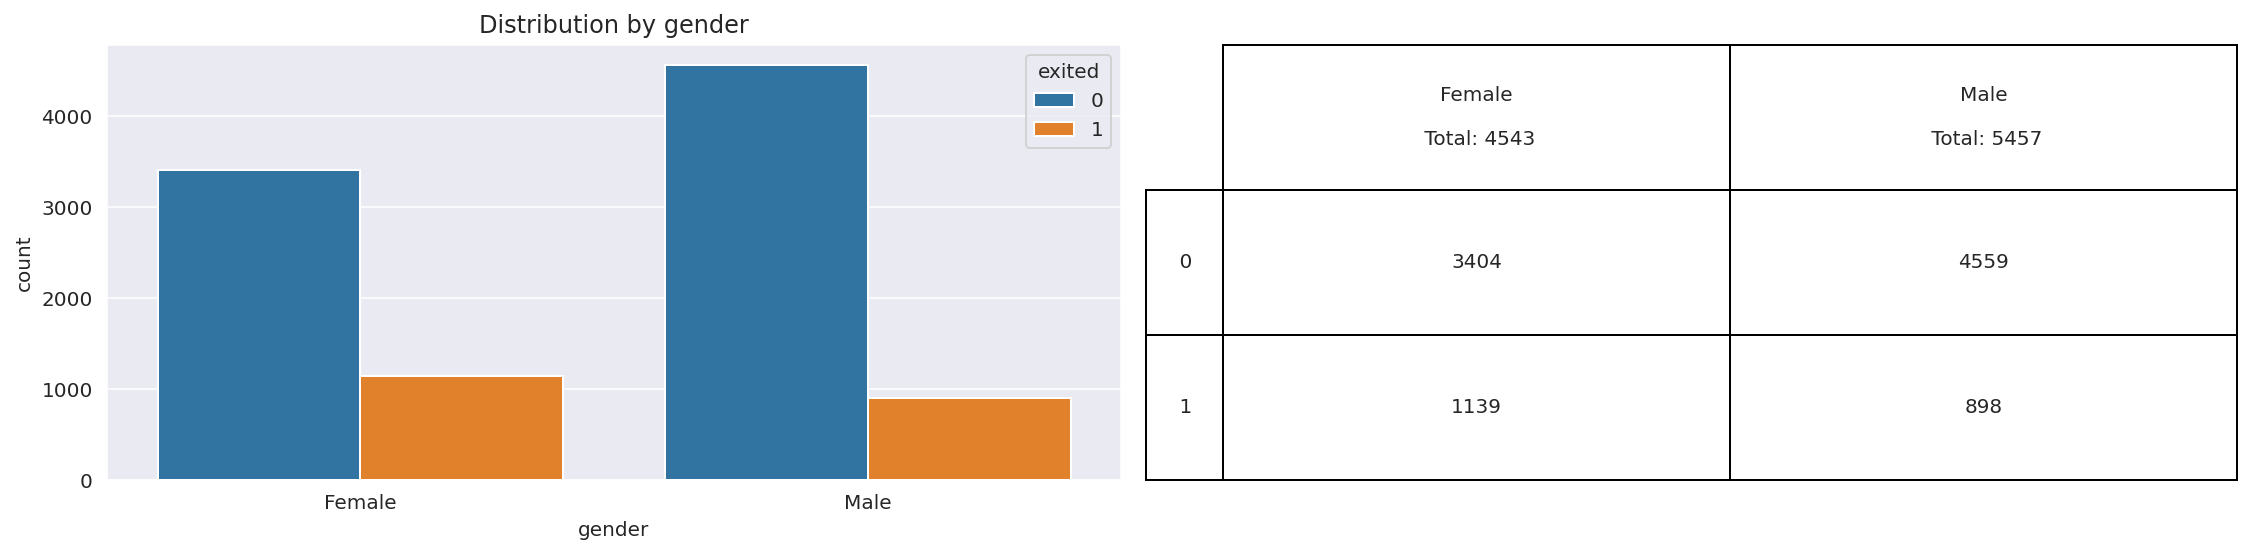

In [18]:
#plot of gender ('gen' column) by exited column
fig = plt.figure(figsize=(20,4), dpi=144)
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(data=churn, x="gender", hue="exited")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Distribution by gender')

columns = ('Female\n\n Total: 4543' , 'Male\n\n Total: 5457')

cell_text = [3404,4559],[1139,898],
ax.table(cellText=cell_text,
         rowLabels=['    0    ','    1    '],
         colLabels=columns,
         loc='right',
         cellLoc='center',
         bbox=(1.1,0.0,1.0,1.0))
plt.show();

As we can see males our more loyal to our bank vs females

<h3>'age' Column</h3>

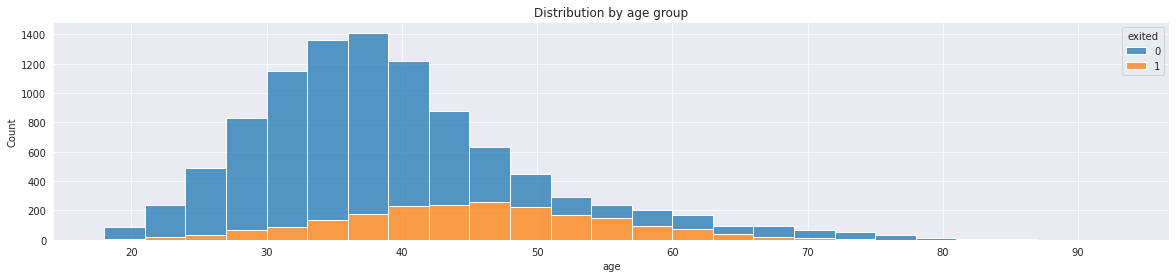

In [19]:
#plot of 'age' column by exited
plt.figure(figsize=(20,4))
sns.histplot(data=churn, x="age",binwidth=3, hue="exited", multiple="stack")
plt.title('Distribution by age group');
plt.show();

Our customers age is around 30s - 40s , the distribution is positive skewed more young people have accounts in our bank than older people , interesting to see that our `exited` leave customer is very low and close to normal than our loyal customer. 

<h3>'credit_score' Column</h3>

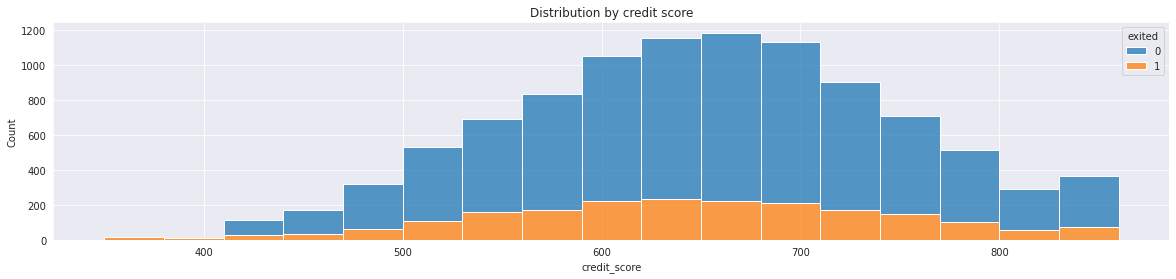

In [20]:
#plot of 'credit_score' column by exited
plt.figure(figsize=(20,4))
sns.histplot(data=churn, x="credit_score",binwidth=30, hue="exited", multiple="stack")
plt.title('Distribution by credit score');
plt.show();

our distribution of credit score looks normal since the leave customers in the section of around 400 is almost 0 and we have more loyal customers in any credit score above then customers how leave the bank

<h3>'Balance' Column</h3>

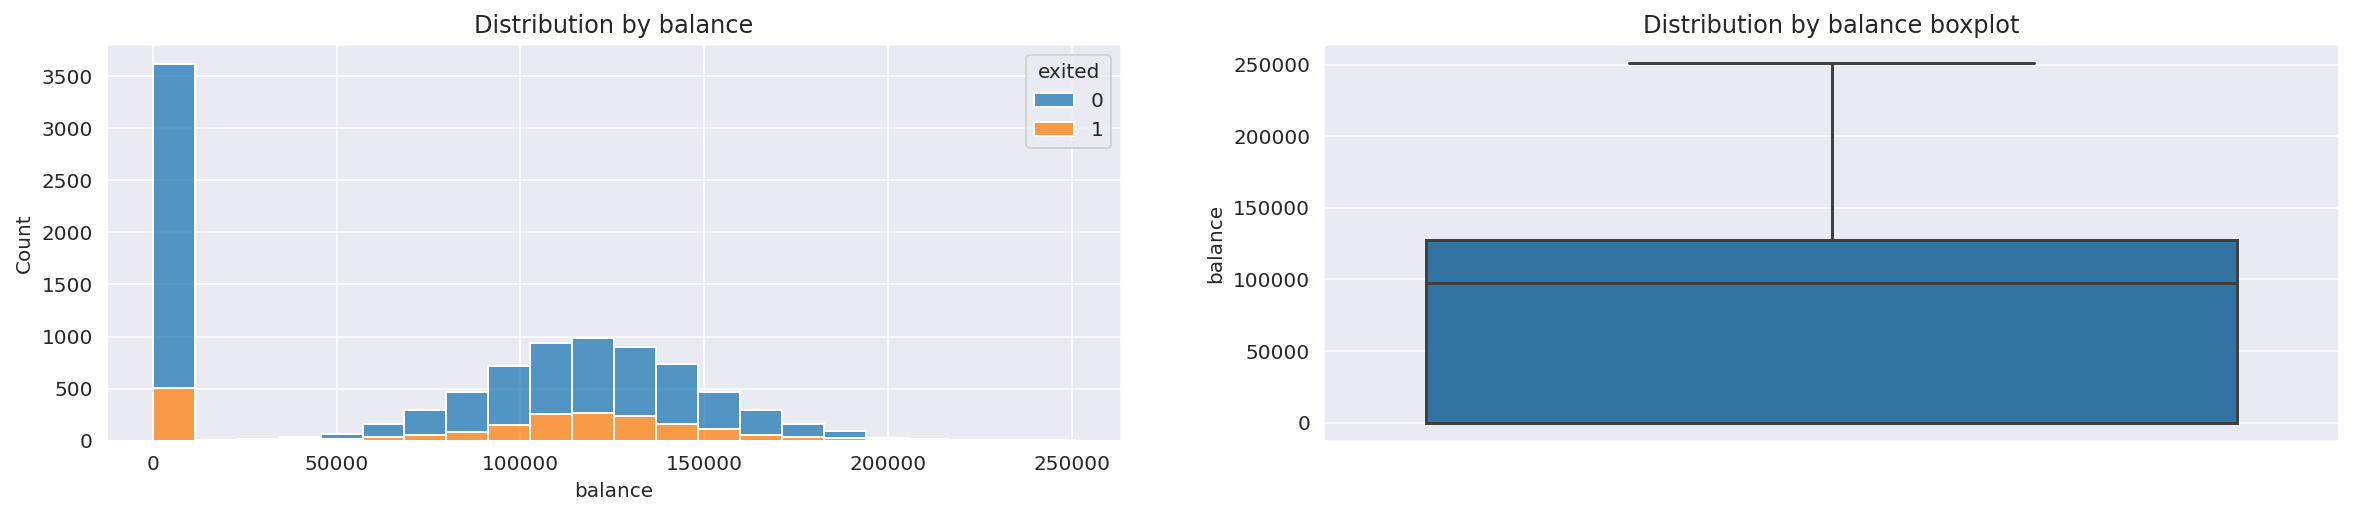

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0


In [21]:
#plot of 'Balance' column by exited
plt.figure(figsize=(20,8), dpi=144)
ax1 = plt.subplot(2,2,1)
ax1 = sns.histplot(data=churn, x="balance", hue="exited" , multiple="stack")
ax1 = plt.title('Distribution by balance')

ax2 = plt.subplot(2,2,2)
ax2 = sns.boxplot(y="balance", data=churn, dodge=False, hue="exited")
ax2 = plt.title('Distribution by balance boxplot')
plt.show();

churn[churn['balance']==0].head()

This distribution is close to normal except for a high number of 0 values. Some of them are observations when a customer left the bank, so 0 balance might be a good predictor for our target. However, we see that customers who stayed (at least at the moment when the data was taken) also sometimes have 0 balances. Probably more information is needed to understand the reason behind.

<h3>'estimated_salary' Column</h3>

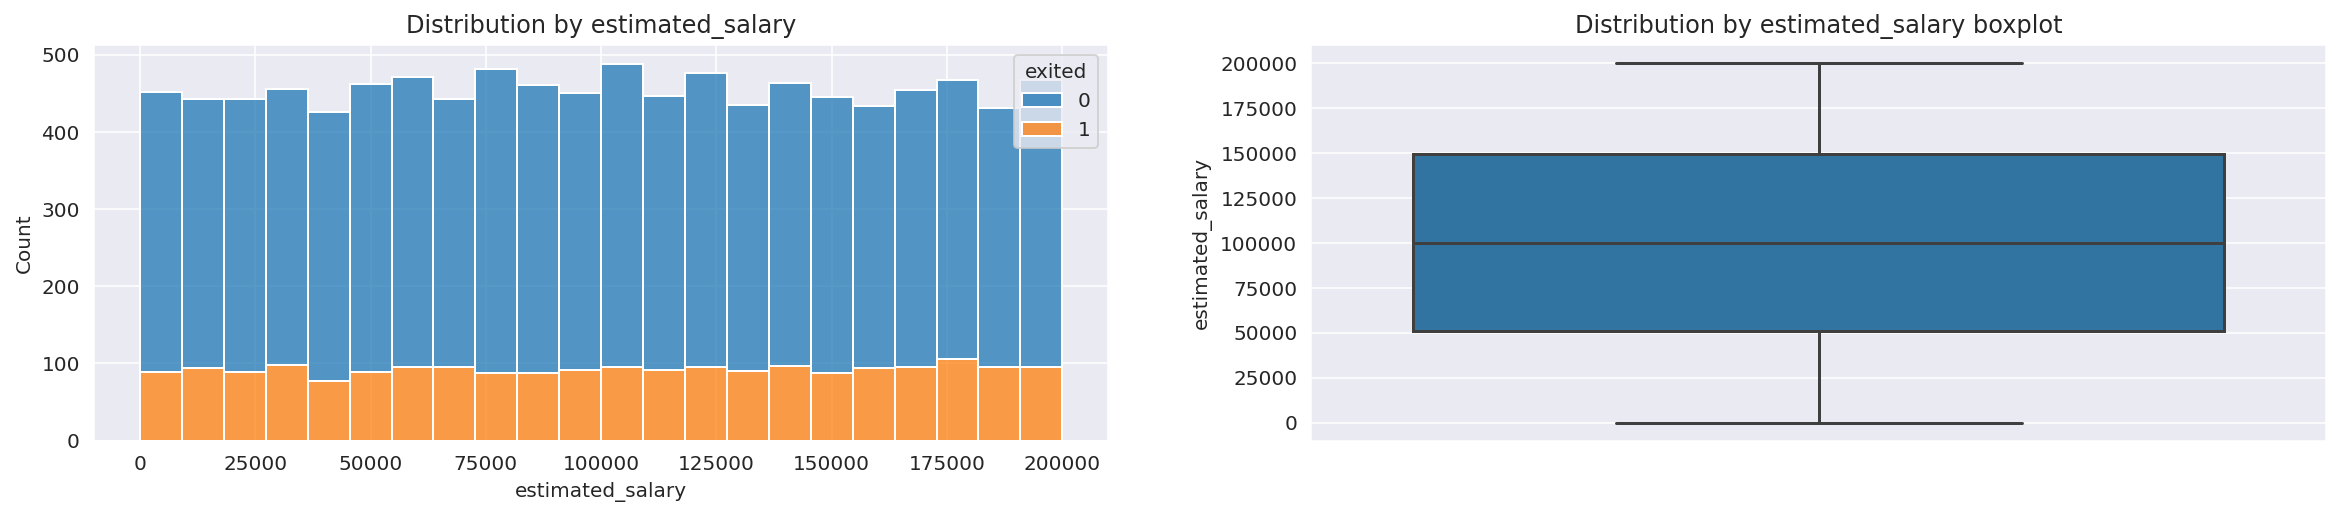

In [22]:
#plot of 'estimated_salary' column by exited
plt.figure(figsize=(20,8), dpi=144)
ax1 = plt.subplot(2,2,1)
ax1 = sns.histplot(data=churn, x="estimated_salary", hue="exited" , multiple="stack")
ax1 = plt.title('Distribution by estimated_salary')

ax2 = plt.subplot(2,2,2)
ax2 = sns.boxplot(y="estimated_salary", data=churn, dodge=False, hue="exited")
ax2 = plt.title('Distribution by estimated_salary boxplot')
plt.show();

We can see uniform distribution , of each range of values that has the same length on the distributions support has equal probability of occurrence so no visible outliers here and it's looks normal

<hr><h3>'exited' Column</h3>

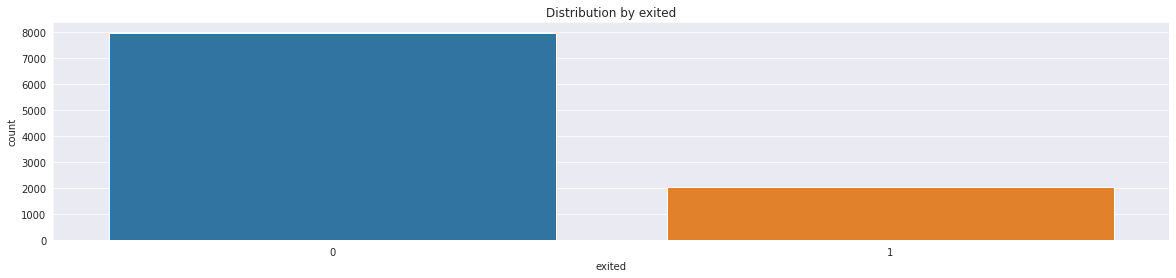

In [23]:
#plot of 'exited' column by exited
plt.figure(figsize=(20,4))
sns.countplot(data=churn, x="exited")
plt.title('Distribution by exited');
plt.show();

We see that our classes are indeed imbalanced: there are more than twice as many observations when a client stayed with the bank than of those who left.

First, let's calculate the baseline F1 score for this dataset and try to run models without taking into account the imbalance.

<hr><h2>Conclusion</h2>

What we found so far:

- we have three countries that the most loyal customers come from france and germany is the most customers leave vs total amount

- our loyal customers in there the middle age 30-40 and the young one is under 18

- that 'estimated_salary' is very stable around all the amount and there isn't one that very low or very high

- most of our customers show balance of 0 and the rest spred from 50k to almost 200k

- our exited show very high in the loyal which is 0 compere to leave the bank which is 1 this could be good or issue with our data imbalance

<hr><div id="Step IV"><h2>IV -Splitting data into train, validation and test sets:</h2></div>

Let's split data into train and test sets with the 80/20 proportion, respectively

In [24]:
features = churn_ohe.drop('exited', axis=1)
target = churn_ohe['exited']
features_train_all, features_test, target_train_all, target_test = train_test_split(features, target, test_size = 0.2, stratify=target, random_state=12345)

We split so that the proportion of values in the sample produced will be the same as the proportion of values on the target variable.

For example, if variable 'target' is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=target will make sure that your random split has 25% of 0's and 75% of 1's.

Next, we'll further split the train set into train and validation with the 80/20 proportion, respectively , also we use ohe on 'exited' column

In [25]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_all, target_train_all, test_size = 0.2, random_state=12345)

In [26]:
features_test.name = 'features_test'
features_valid.name = 'features_valid'
features_train.name = 'features_train'
target_train.name = 'target_train'
target_valid.name = 'target_valid'
target_test.name = 'target_test'

In [27]:
for part in [features_train, target_train, features_valid, target_valid, features_test, target_test]:
    print("Size of", part.name, ":", part.shape[0]/churn.shape[0])

Size of features_train : 0.64
Size of target_train : 0.64
Size of features_valid : 0.16
Size of target_valid : 0.16
Size of features_test : 0.2
Size of target_test : 0.2


<hr><h3>Standard Scaling</h3>

We will scale our features with Standard Scaler, this will convert our dataset into numpy arrays, so after they are transformed, let's convert them back to datasets.

In [28]:
# features scaling
sc = ss()
features_train_scaled = sc.fit_transform(features_train)
features_valid_scaled = sc.transform(features_valid)
features_test_scaled = sc.transform(features_test)

In [29]:
features_train = pd.DataFrame(data=features_train_scaled,index=features_train.index,columns=features_train.columns) 
features_valid = pd.DataFrame(data=features_valid_scaled,index=features_valid.index,columns=features_valid.columns) 
features_test = pd.DataFrame(data=features_test_scaled,index=features_test.index,columns=features_test.columns) 

<h3>Models with class imbalance</h3>

<b>F1 score baseline</b>

Our case it's more important that a model correctly predicts the minority class - whether a customer left the bank, that's why we will choose the strategy constant for the dummy classifier

In [30]:
base_model = DummyClassifier(strategy='constant',constant=1,random_state=12345)
base_model.fit(features_train, target_train)
target_pred = base_model.predict(features_valid)

f1_baseline = round(f1_score(target_valid,target_pred) * 100, 2)
print("Baseline F1 score:", f1_baseline)

Baseline F1 score: 34.37


We see that our baseline of F1 score is more than 34% , this mean our models need to do better the this value

<b>Decision_tree imbalance</b>

In [31]:
decision_tree = DecisionTreeClassifier(random_state=12345)
decision_tree.fit(features_train, target_train)
target_pred = decision_tree.predict(features_valid)

f1_DT_imbalance = round(f1_score(target_valid,target_pred) * 100, 2)
f1_DT_imbalance

46.03

<b>LogisticRegression imbalance</b>

In [32]:
LR = LogisticRegression(random_state=12345)
LR.fit(features_train, target_train)     
target_pred = LR.predict(features_valid)

f1_LR_imbalance = round(f1_score(target_valid, target_pred) * 100, 2)
f1_LR_imbalance

32.37

<b>RandomForestClassifier imbalance</b>

In [33]:
rfc = RandomForestClassifier(random_state=12345)
rfc.fit(features_train, target_train)
target_pred = rfc.predict(features_valid)

f1_rfc_imbalance = round(f1_score(target_valid,target_pred) * 100, 2)
f1_rfc_imbalance

55.34

We can see that our three models gave us lower F1 score than our target 0.59 , when our Logistic Regression have got even lower than our F1 base score. so we need to correct the imbalance and keep testing.

<hr><div id="Step V"><h2>V - Class imbalance correction and hyper parameter tuning</h2>

In this section we going to try to correct the class imbalance using the following methods:

- Class Weight Adjustment

- Upsampling

- Downsampling

So we going to tune our three models and find the best one that pass the 0.59 F1 Score


<h3>Method 1: Class Weight Adjustment</h3>

<b>DecisionTree</b> 

In [34]:
#decision_tree_classifier after tune balanced to improve the f1 score
d = []
for depth in range(1,10):
    decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345, max_depth=depth)
    decision_tree.fit(features_train, target_train)
    target_pred = decision_tree.predict(features_valid)
    f1_DT_balanced = round(f1_score(target_valid,target_pred) * 100, 2)
    d.append(
        {
            'max_depth': depth,
            'f1_DT_balanced':  f1_DT_balanced
          }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_DT_balanced'], keep='first')
f1_DT_balanced = best_param['f1_DT_balanced'].values
best_param

,max_depth,f1_DT_balanced
5,6,61.95


<b>LogisticRegression</b> 

In [35]:
d = []
for penalty in ['l1', 'l2']:
    for C in np.arange(0.01,1,0.01):
        LR = LogisticRegression(solver="liblinear", penalty=penalty, class_weight='balanced', C=C, random_state=12345)
        LR.fit(features_train, target_train)     
        target_pred = LR.predict(features_valid)
        f1_LR_balanced = round(f1_score(target_valid,target_pred) * 100, 2)
        d.append(
            {
                'penalty': penalty,
                'C': C,
                'f1_LR_balanced':  f1_LR_balanced
            }
        )
best_param = pd.DataFrame(d).nlargest(1, ['f1_LR_balanced'], keep='first')
f1_LR_balanced = best_param['f1_LR_balanced'].values
best_param

,penalty,C,f1_LR_balanced
0,l1,0.01,50.57


<b>RandomForestClassifier</b> 

In [36]:
d = []
for estim in range(1,51,9):
    for depth in range(1,10):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth, class_weight='balanced')
        rfc.fit(features_train, target_train)
        target_pred = rfc.predict(features_valid)
        f1_rfc_balanced = round(f1_score(target_valid,target_pred) * 100, 2)
        d.append(
            {
                'n_estimators': estim,
                'max_depth': depth,
                'f1_rfc_balanced':  f1_rfc_balanced
            }
        )

best_param = pd.DataFrame(d).nlargest(1, ['f1_rfc_balanced'], keep='first')
f1_rfc_balanced = best_param['f1_rfc_balanced'].values
best_param

,n_estimators,max_depth,f1_rfc_balanced
43,37,8,62.8


<hr><h2>Method 2: Upsampling</h2>

In [37]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled  = upsample(features_train, target_train, 4)

<b>Decision_tree</b> 

In [38]:
d = []
for depth in range(1,10):
    decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    decision_tree.fit(features_train_upsampled, target_train_upsampled)
    target_pred = decision_tree.predict(features_valid)
    f1_DT_upsampled = round(f1_score(target_valid,target_pred) * 100, 2)
    d.append(
        {
            'max_depth': depth,
            'f1_DT_upsampled':  f1_DT_upsampled
          }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_DT_upsampled'], keep='first')
f1_DT_upsampled = best_param['f1_DT_upsampled'].values
best_param

,max_depth,f1_DT_upsampled
5,6,61.2


<b>LogisticRegression</b> 

In [39]:
d = []
for penalty in ['l1', 'l2']:
    for C in np.arange(0.01,1,0.01):
        LR = LogisticRegression(solver="liblinear", penalty=penalty, C=C, random_state=12345)
        LR.fit(features_train_upsampled, target_train_upsampled)     
        target_pred = LR.predict(features_valid)
        f1_LR_upsampled = round(f1_score(target_valid,target_pred)* 100, 2)
        d.append(
            {
                'penalty': penalty,
                'C': C,
                'f1_LR_upsampled':  f1_LR_upsampled
            }
        )
best_param = pd.DataFrame(d).nlargest(1, ['f1_LR_upsampled'], keep='first')
f1_LR_upsampled = best_param['f1_LR_upsampled'].values
best_param

,penalty,C,f1_LR_upsampled
100,l2,0.02,50.59


<b>RandomForestClassifier</b> 

In [40]:
d = []
for est in range(1,51,9):
    for depth in range(1,10):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rfc.fit(features_train_upsampled, target_train_upsampled)
        target_pred = rfc.predict(features_valid)
        f1_rfc_upsampled = round(f1_score(target_valid,target_pred) * 100, 2)
        d.append(
            {
                'n_estimators': est,
                'max_depth': depth,
                'f1_rfc_upsampled':  f1_rfc_upsampled
            }
        )

best_param = pd.DataFrame(d).nlargest(1, ['f1_rfc_upsampled'], keep='first')
f1_rfc_upsampled = best_param['f1_rfc_upsampled'].values
best_param

,n_estimators,max_depth,f1_rfc_upsampled
44,37,9,62.12


<hr><h2>Method 3: Downsampling</h2>

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.4)

<b>Decision_tree</b> 

In [42]:
d = []
for depth in range(1,10):
    decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    decision_tree.fit(features_train_downsampled, target_train_downsampled)
    target_pred = decision_tree.predict(features_valid)
    f1_DT_downsampled = round(f1_score(target_valid,target_pred) * 100, 2)
    d.append(
        {
            'max_depth': depth,
            'f1_DT_downsampled':  f1_DT_downsampled
          }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_DT_downsampled'], keep='first')
f1_DT_downsampled = best_param['f1_DT_downsampled'].values
best_param

,max_depth,f1_DT_downsampled
5,6,59.72


<b>LogisticRegression</b> 

In [43]:
d = []
for penalty in ['l1', 'l2']:
    for C in np.arange(0.01,1,0.01):
        LR = LogisticRegression(solver="liblinear", penalty=penalty, C=C, random_state=12345)
        LR.fit(features_train_downsampled, target_train_downsampled)     
        target_pred = LR.predict(features_valid)
        f1_LR_downsampled = round(f1_score(target_valid,target_pred) * 100, 2)
        d.append(
            {
                'penalty': penalty,
                'C': C,
                'f1_LR_downsampled':  f1_LR_downsampled
            }
        )
best_param = pd.DataFrame(d).nlargest(1, ['f1_LR_downsampled'], keep='first')
f1_LR_downsampled = best_param['f1_LR_downsampled'].values
best_param

,penalty,C,f1_LR_downsampled
9,l1,0.1,51.85


<b>RandomForestClassifier</b> 

In [44]:
d = []
for estim in range(1,51,9):
    for depth in range(1,10):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        rfc.fit(features_train_downsampled, target_train_downsampled)
        target_pred = rfc.predict(features_valid)
        f1_rfc_downsampled = round(f1_score(target_valid,target_pred) * 100, 2)
        d.append(
            {
                'n_estimators': estim,
                'max_depth': depth,
                'f1_rfc_downsampled':  f1_rfc_downsampled
            }
        )

best_param = pd.DataFrame(d).nlargest(1, ['f1_rfc_downsampled'], keep='first')
f1_rfc_downsampled = best_param['f1_rfc_downsampled'].values
best_param

,n_estimators,max_depth,f1_rfc_downsampled
53,46,9,62.08


<hr>
<h2><center>Summary results F1 Score vs different models</center></h2>

|Model (Classifier) | imbalance | balanced | upsampled | downsampled |
|:-------|-------|-------|-------|-------|
|Decision Tree  | 0.46 | 0.62 | 0.61 | 0.60 |
|Logistic Regression  | 0.33 | 0.51 | 0.51 | 0.52 |
|Random Forest | 0.56 | 0.63 | 0.62 | 0.62 |

* F1 Score baseline is : 0.34

After our testing we see that Random Forest and Decision Tree gave us the best result using the Class Weight balanced 0.63 and 0.62 and since the result of Random Forest over all was higher we going to select it as our choice model.

<hr><h2>Retrain the best tuned model on the whole training set and test it on the test set</h2>

In [45]:
rfc = RandomForestClassifier(n_estimators=46, max_depth=7, random_state=12345, class_weight='balanced')
rfc.fit(features_train, target_train)
target_pred = rfc.predict(features_test)

f1_rfc = round(f1_score(target_test,target_pred) * 100, 2)
f1_rfc

63.18

<h3>Sanity check</h3>

Our final F1 score of this model is much higher than the baseline F1 score that we would get if instead of classifying we simply predicted minority class target value for each new observation

<h3>AUC-ROC</h3>

To find how much our model differs from the random model, let's calc the AUC-ROC value (Area Under Curve ROC) This is an evaluation metric with values in the range from 0 to 1. The AUC-ROC value for a random model is 0.5

Unlike other metrics, it takes class "1" probabilities instead of predictions

In [46]:
probabilities_test = rfc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

In [47]:
auc_roc = round(roc_auc_score(target_test, probabilities_one_test) * 100, 2)
auc_roc

86.66

Our AUC-ROC value is very high, it means that our model's predictions are correct in more than 80% of cases, ROC curve takes the target values and the positive class probabilities, goes over different thresholds, and returns three lists: 

- FPR values 

- TPR values

- Thresholds it went over

For a model that always answers randomly, the ROC curve is a diagonal line going from the lower left to the upper right.

The higher the curve, the greater the TPR value and the better the model's quality.

In [48]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

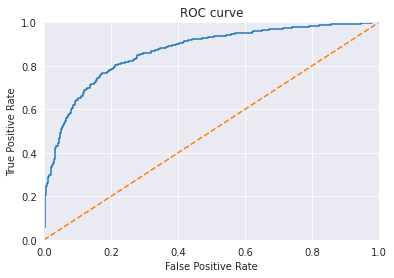

In [49]:
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve')
plt.show();

We see that our final model is performing quite well its ROC curve is much higher than the diagonal

<div id="general_conclusion"><h2>General conclusion</h2></div>

<b><u>INTRODUCTION</u></b>


We work at 'Beta Bank', And we notices that slowly one month after another, customers close their accounts and leave in favor of other banks. Therefore, the management decided to try to preserve the existing one and prevent the movement out, before turning to a new customer base that will increase the number of customers and the bank's profits again.

<b><u>Our plan:</u></b>

- Dev' a model that will predict whether a customer going to leave or not


- Ml model with at least 0.59 maximum possible F1 score 


- Measure the AUC-ROC metric and compare it to the F1 score


<b>I - Open our data</b>

What we found:
    
- we have total of 14 columns 

- 10k rows in each one except one that missing 909 values Tenure
    
- we going to change the 'Tenure' column from float to integer

- NumOfProducts is between 1 to 4

- HasCrCard and IsActiveMember is boolean of 0 and 1 (no and yes)

<b>II - Prepare the data </b>

What we did:

- lower case the columns name and put underline in multiple words column names

- fix our missing values in 'tenure' using lambda and fillna median using the groupby column num_of_products

- drop the columns 'customer_id','row_number', 'surname' 

- remove the first rows of our dataset using the ohe to avoid the dummy trap

- change the dtype of 'tenure' from float to integer 


<b>III - Eploratory data analysis to our target column 'exited'</b>

- we have three countries that the most loyal customers come from france and germany is the most customers leave vs total amount

- our loyal customers in there the middle age 30-40 and the young one is under 18

- that 'estimated_salary' is very stable around all the amount and there isn't one that very low or very high

- most of our customers show balance of 0 and the rest spred from 50k to almost 200k

- our exited show very high in the loyal which is 0 compere to leave the bank which is 1 this could be good or issue with our data imbalance

<b>IV - Splitting data into train, validation and test sets:</b>

We split so that the proportion of values in the sample produced will be the same as the proportion of values on the target variable.

For example, if variable 'target' is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=target will make sure that your random split has 25% of 0's and 75% of 1's.

Next, we'll further split the train set into train and validation with the 80/20 proportion, respectively , also we use ohe on 'exited' column

We will scale our features with Standard Scaler, this will convert our dataset into numpy arrays, so after they are transformed, let's convert them back to datasets.

Our case it's more important that a model correctly predicts the minority class - whether a customer left the bank, that's why we will choose the strategy constant for the dummy classifier

In the next step we have tried to correct **imbalance classes** using 3 methods: 

- class weight adjustment

- upsampling

- downsampling

We have also tuned each of the 3 chosen algorithms (Decision Tree, Random Forest and Logistic Regression) and searched for the best **hyperparameters** in order to select the best model 

**Random Forest model using Class Weight Adjustment method** showed the highest score 0.63. Then we have retrained this model on the whole training set (including validation set) and tested it with the test set that our model didn't see before. We have reached **63.2% F1 score on the test set** 

Next, we have checked our model for **sanity** by comparing the final score to the baseline F1 score. The final F1 score of our model is much higher than the baseline F1 score that we would get if instead of classifying we simply predicted minority class target value for each new observation

Finally, we have calculated the AUC-ROC value and it turned out to be **86.66%**, which means that our model's predictions are correct in more than 80% of cases. We have also plotted the ROC curve. It visualized well the fact that our final model is performing quite well - its ROC curve is much higher than the diagonal

<h2>Overall conclusion</h2>

What we learned in this project, that our bank customers come from three countries: France, Spain and Germany whose loyal customers are from France and the majority who leave in relation to the total amount are from Germany, the balance in the majority of non-leaving accounts is 0. Which causes a balance return in the data we corrected in order to reach the target of 0.59 and above, that most customers are men and on the female side also the percentage of departure is higher, that the monthly income ratio throughout the data is quite stable and there is no deviation below or above. Because there are below and above. In order to predict the departure we used F1 Score as a base with three modules that thanks to slight changes and balance managed to cross the target and even reach the highest 0.63 with a percentage ratio of over 80%. Bank what will help the management team in future considerations